# SVM (Support Vector Machine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Convert Categorical into Numerical

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList=['Sex','Embarked']
for feat in objList:
    df[feat] = le.fit_transform(df[feat])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [4]:
df = df.drop(['Name','Ticket','Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [6]:
DV = ['Survived','Sex','Pclass','SibSp','Parch','Embarked']

In [8]:
from sklearn import svm

In [9]:
clf=svm.SVC(gamma=0.01,C=100)

In [11]:
i=0
arr = [None] * 6
for a in DV:
    y=df[a]
    X=df.drop([a,'PassengerId'],axis=1)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred,normalize=True)
    print("accuracy_score of ",a,"is: ",acc)
    arr[i]=acc
    i=i+1
    mat=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix: ",mat)
    print('\n')
    

accuracy_score of  Survived is:  0.7415730337078652
Confusion Matrix:  [[124  33]
 [ 36  74]]


accuracy_score of  Sex is:  0.7265917602996255
Confusion Matrix:  [[ 66  32]
 [ 41 128]]


accuracy_score of  Pclass is:  0.9026217228464419
Confusion Matrix:  [[ 64   4   2]
 [  4  36   9]
 [  1   6 141]]


accuracy_score of  SibSp is:  0.7490636704119851
Confusion Matrix:  [[150  24   7   0   1   0   0]
 [ 21  39   5   0   0   0   0]
 [  4   1   3   0   0   0   0]
 [  0   2   1   3   1   0   0]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]]


accuracy_score of  Parch is:  0.797752808988764
Confusion Matrix:  [[187   6   5   0   0   0]
 [ 21  15   3   0   0   1]
 [ 10   6  11   0   0   0]
 [  0   0   1   0   0   0]
 [  1   0   0   0   0   0]
 [  0   0   0   0   0   0]]


accuracy_score of  Embarked is:  0.7677902621722846
Confusion Matrix:  [[ 23   2  24]
 [  0   8  14]
 [ 18   4 174]]




Maximum accuracy:- 0.9026217228464419 for Pclass


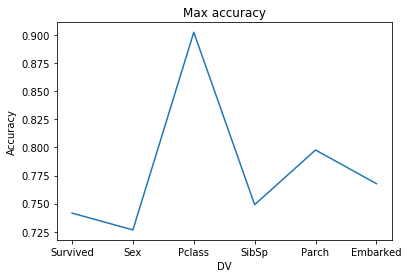

In [12]:
plt.plot(DV,arr)
plt.title('Max accuracy')
plt.xlabel('DV')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(arr),"for",DV[arr.index(max(arr))])